## Coupon_detail_train

: 쿠폰 인터넷 방문기록 관련 속성

In [1]:
from ml_config import *

### 1. Data Load

In [2]:
coupon_detail = pd.read_csv('../data/coupon_detail_train.csv')
coupon_detail.tail()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
168991,1,2012-02-07 12:14,Ikebukuro Kagurazaka-Akabane,84b0c66349ae3c807f1d4601bfc0e8f6,280f0cedda5c4b171ee6245889659571,6eac7a7e347c563e5e00086f5eb47903
168992,1,2012-02-28 15:43,"Ginza Shinbashi, Tokyo, Ueno",f7b2b854457ae6ece44be04c32520064,280f0cedda5c4b171ee6245889659571,a406e389e35e1140e4bc9b472d8258df
168993,1,2012-03-19 12:11,"Ginza Shinbashi, Tokyo, Ueno",e12f28eb208f5466dede7a7cb2fc566b,280f0cedda5c4b171ee6245889659571,36addcc4b958135895c859d8783e3cd2
168994,2,2012-04-12 12:27,"Shinjuku, Takadanobaba Nakano - Kichijoji",bcade77b186543a4820b3a6e3c06ad2f,280f0cedda5c4b171ee6245889659571,cb0244705306aafccc47bfe62ece39d3
168995,1,2012-05-09 12:12,"Shinjuku, Takadanobaba Nakano - Kichijoji",fec51967a2f8135aa929cf2b5cc8722c,280f0cedda5c4b171ee6245889659571,31a605db6db5ad3fa3b2d4cf69ae3272


### 2. Overall EDA

In [3]:
coupon_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168996 entries, 0 to 168995
Data columns (total 6 columns):
ITEM_COUNT         168996 non-null int64
I_DATE             168996 non-null object
SMALL_AREA_NAME    168996 non-null object
PURCHASEID_hash    168996 non-null object
USER_ID_hash       168996 non-null object
COUPON_ID_hash     168996 non-null object
dtypes: int64(1), object(5)
memory usage: 7.7+ MB


In [4]:
# Unique
for i in range(0, 5+1):
    print('{} : {}'.format(coupon_detail.columns[i], len(set(coupon_detail[coupon_detail.columns[i]]))))

ITEM_COUNT : 32
I_DATE : 130309
SMALL_AREA_NAME : 55
PURCHASEID_hash : 168996
USER_ID_hash : 22782
COUPON_ID_hash : 19368


### 3. ITEM_COUNT

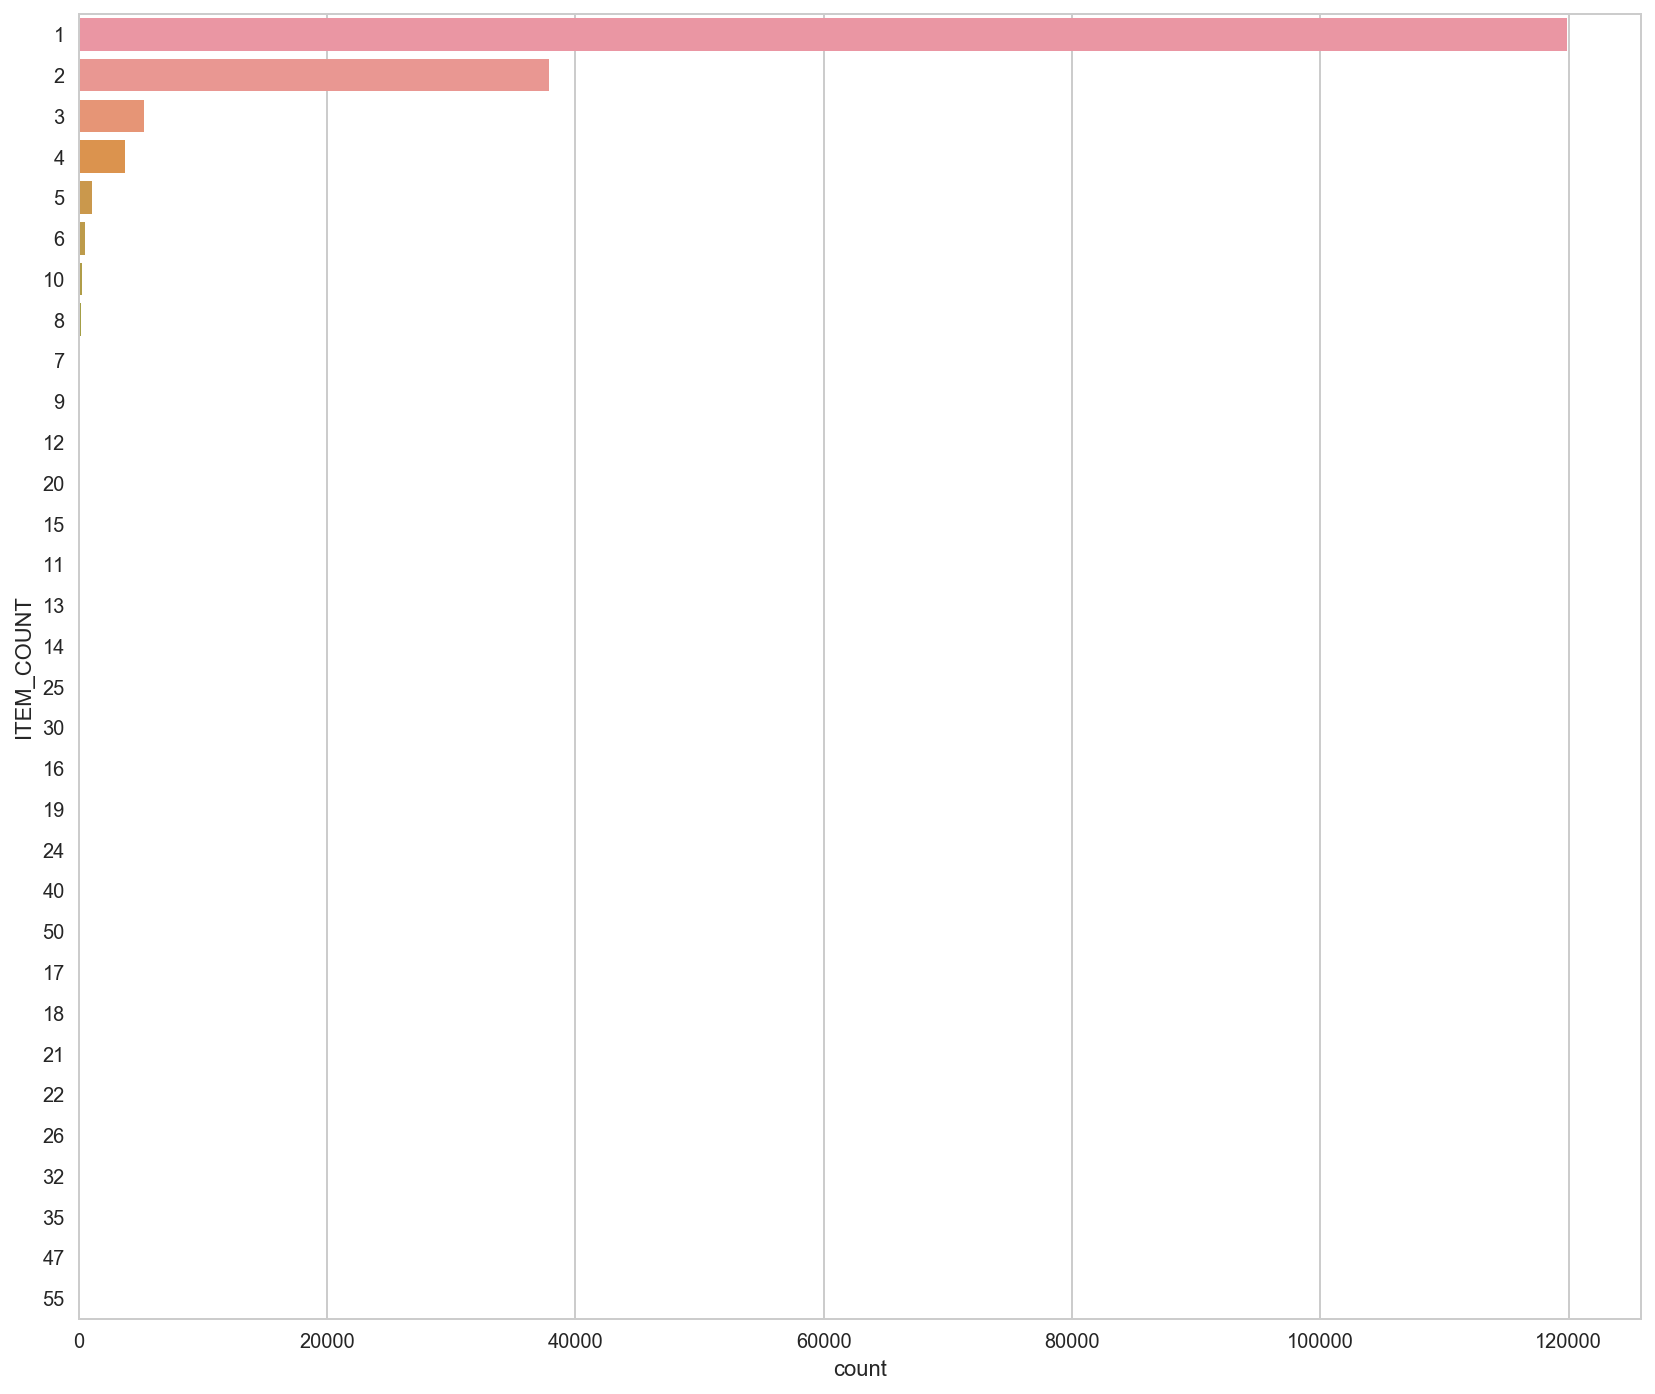

In [5]:
plt.figure(figsize=(14, 12))
sns.countplot(y = coupon_detail['ITEM_COUNT'], data = coupon_detail, order = coupon_detail['ITEM_COUNT'].value_counts().index)
plt.show()

In [6]:
ITEM_COUNT = coupon_detail.groupby("ITEM_COUNT").size().reset_index(name='counts')
ITEM_COUNT = ITEM_COUNT.sort_values(by=['counts'], ascending=False)
ITEM_COUNT = ITEM_COUNT.reset_index(drop=True)
ITEM_COUNT['ratio'] = (ITEM_COUNT['counts']/sum(ITEM_COUNT['counts'])*100)
ITEM_COUNT.head(10)

,ITEM_COUNT,counts,ratio
0,1,119832,70.908187
1,2,37869,22.408223
2,3,5252,3.107766
3,4,3717,2.199460
4,5,1085,0.642027
5,6,549,0.324860
6,10,245,0.144974
7,8,174,0.102961
8,7,137,0.081067
9,9,36,0.021302


### 4. I_DATE

In [7]:
coupon_detail["I_DATE"] = pd.to_datetime(coupon_detail["I_DATE"]) # date_time으로 변환
coupon_detail["I_YEAR"] = coupon_detail["I_DATE"].dt.year # 년
coupon_detail["I_MONTH"] = coupon_detail["I_DATE"].dt.month # 월
coupon_detail["I_WEEKDAY"] = coupon_detail["I_DATE"].dt.weekday # 일
coupon_detail["I_HOUR"] = coupon_detail["I_DATE"].dt.hour # 시간
coupon_detail.tail()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash,I_YEAR,I_MONTH,I_WEEKDAY,I_HOUR
168991,1,2012-02-07 12:14:00,Ikebukuro Kagurazaka-Akabane,84b0c66349ae3c807f1d4601bfc0e8f6,280f0cedda5c4b171ee6245889659571,6eac7a7e347c563e5e00086f5eb47903,2012,2,1,12
168992,1,2012-02-28 15:43:00,"Ginza Shinbashi, Tokyo, Ueno",f7b2b854457ae6ece44be04c32520064,280f0cedda5c4b171ee6245889659571,a406e389e35e1140e4bc9b472d8258df,2012,2,1,15
168993,1,2012-03-19 12:11:00,"Ginza Shinbashi, Tokyo, Ueno",e12f28eb208f5466dede7a7cb2fc566b,280f0cedda5c4b171ee6245889659571,36addcc4b958135895c859d8783e3cd2,2012,3,0,12
168994,2,2012-04-12 12:27:00,"Shinjuku, Takadanobaba Nakano - Kichijoji",bcade77b186543a4820b3a6e3c06ad2f,280f0cedda5c4b171ee6245889659571,cb0244705306aafccc47bfe62ece39d3,2012,4,3,12
168995,1,2012-05-09 12:12:00,"Shinjuku, Takadanobaba Nakano - Kichijoji",fec51967a2f8135aa929cf2b5cc8722c,280f0cedda5c4b171ee6245889659571,31a605db6db5ad3fa3b2d4cf69ae3272,2012,5,2,12


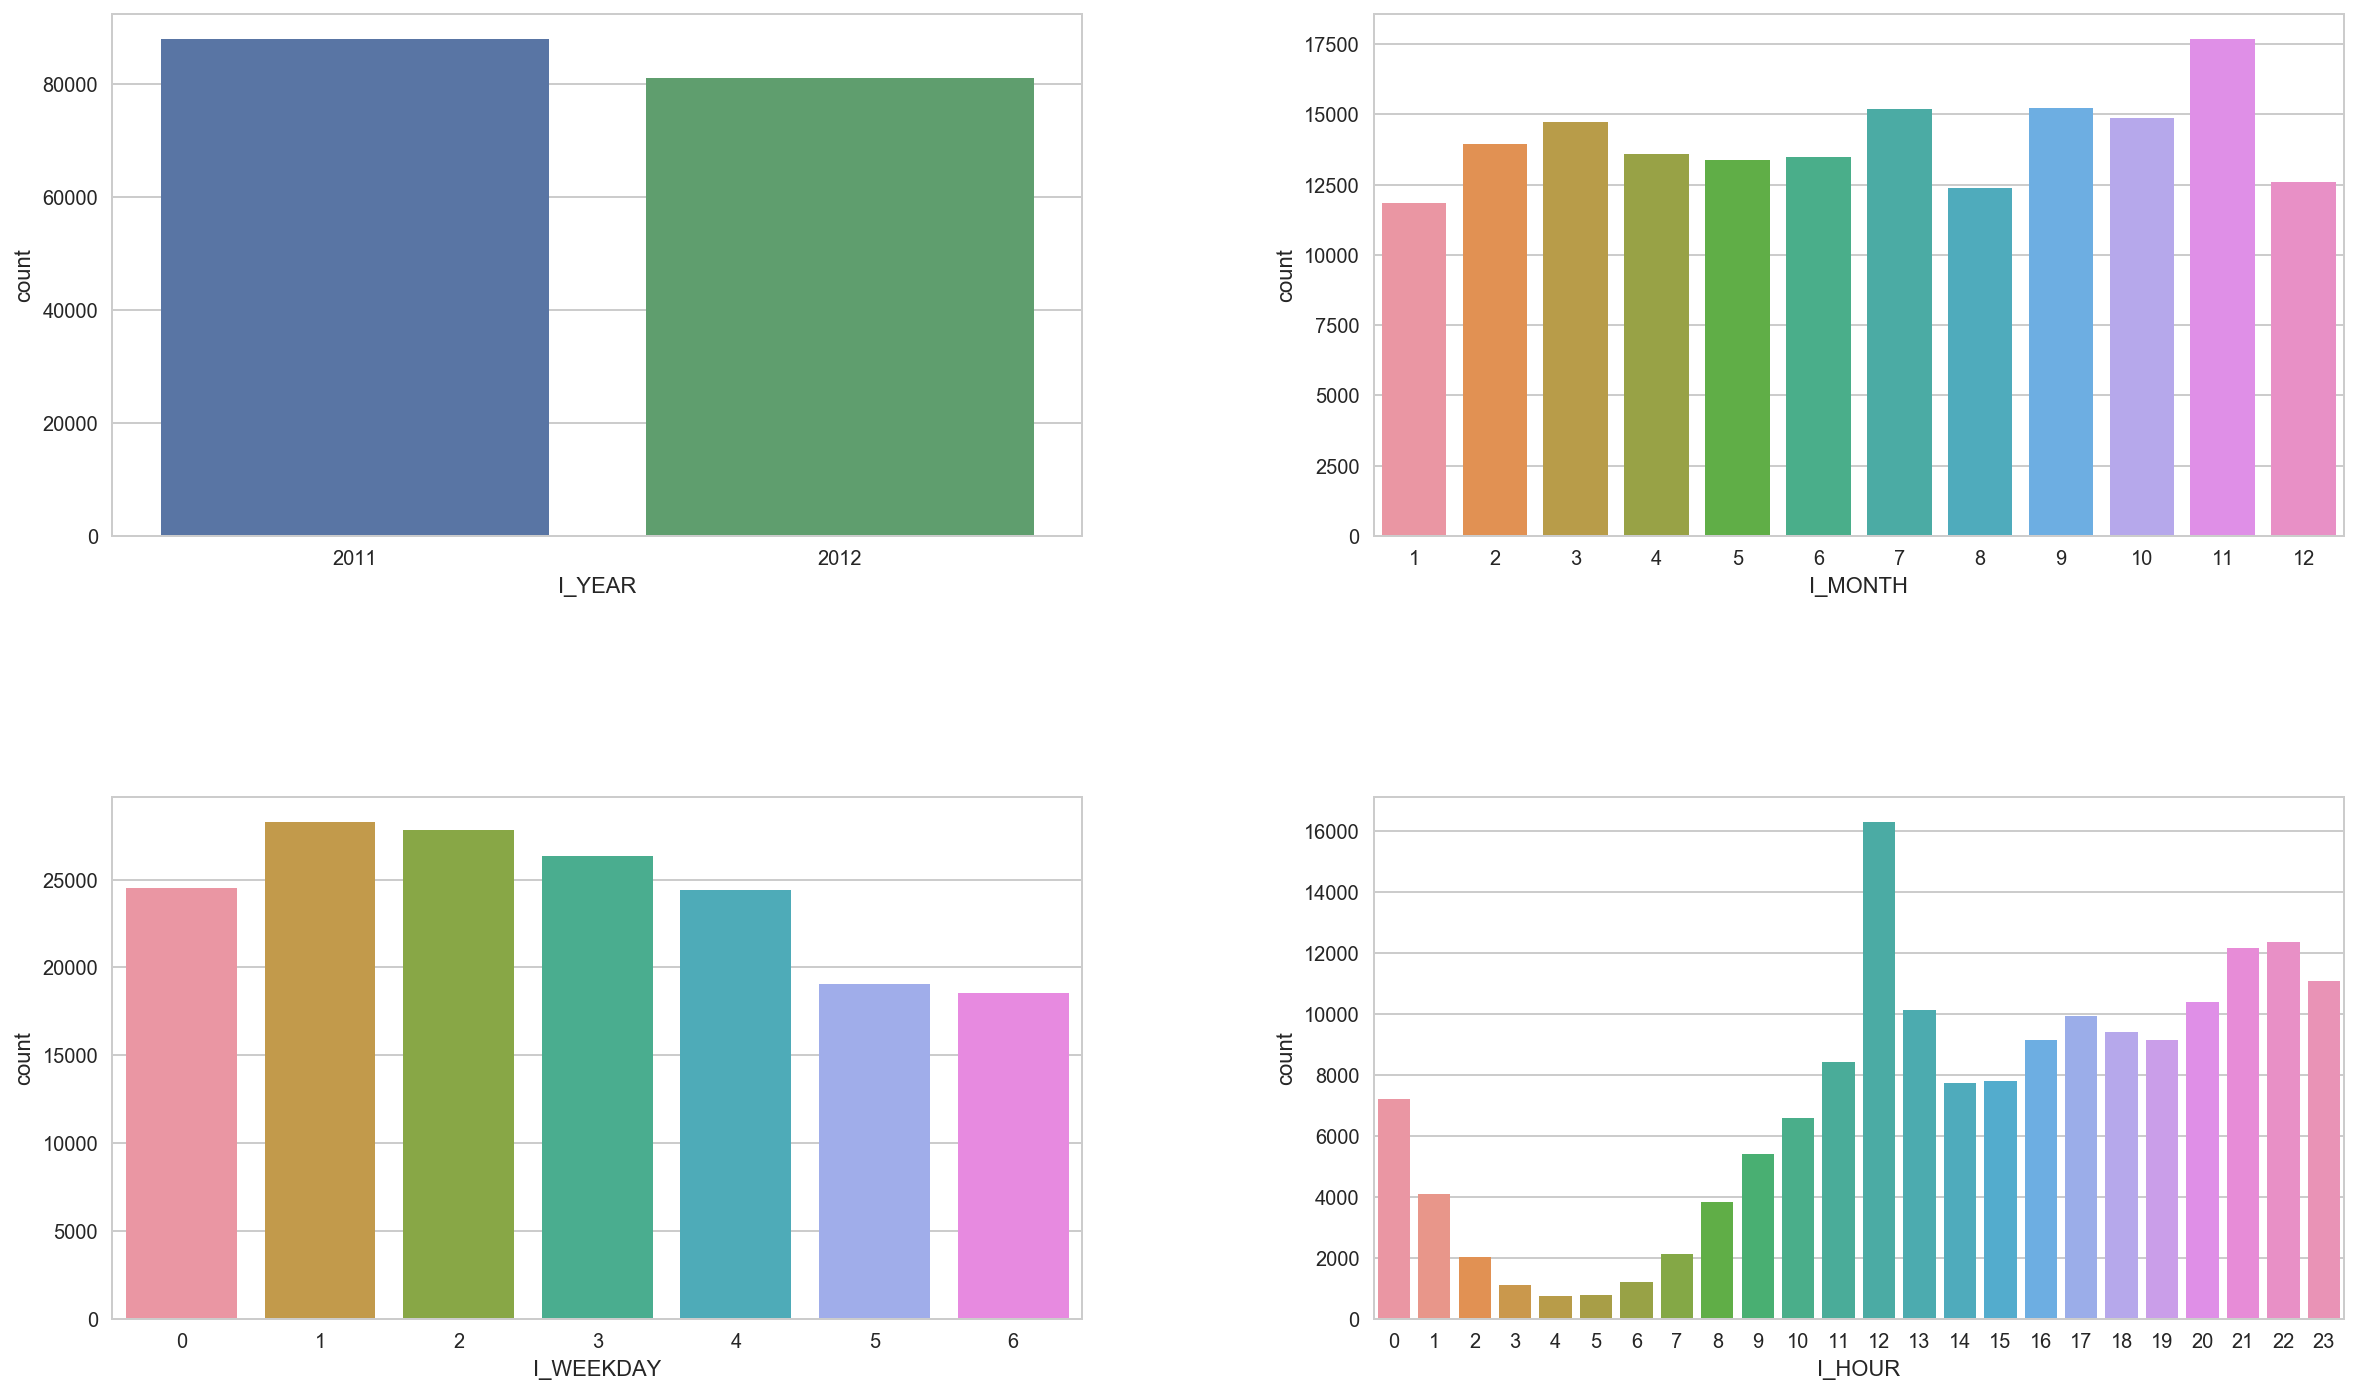

In [8]:
# countplot
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2,2,i-5)
    sns.countplot(x = coupon_detail.columns[i], data = coupon_detail)
    
plt.show()

### 5. SMALL_AREA_NAME

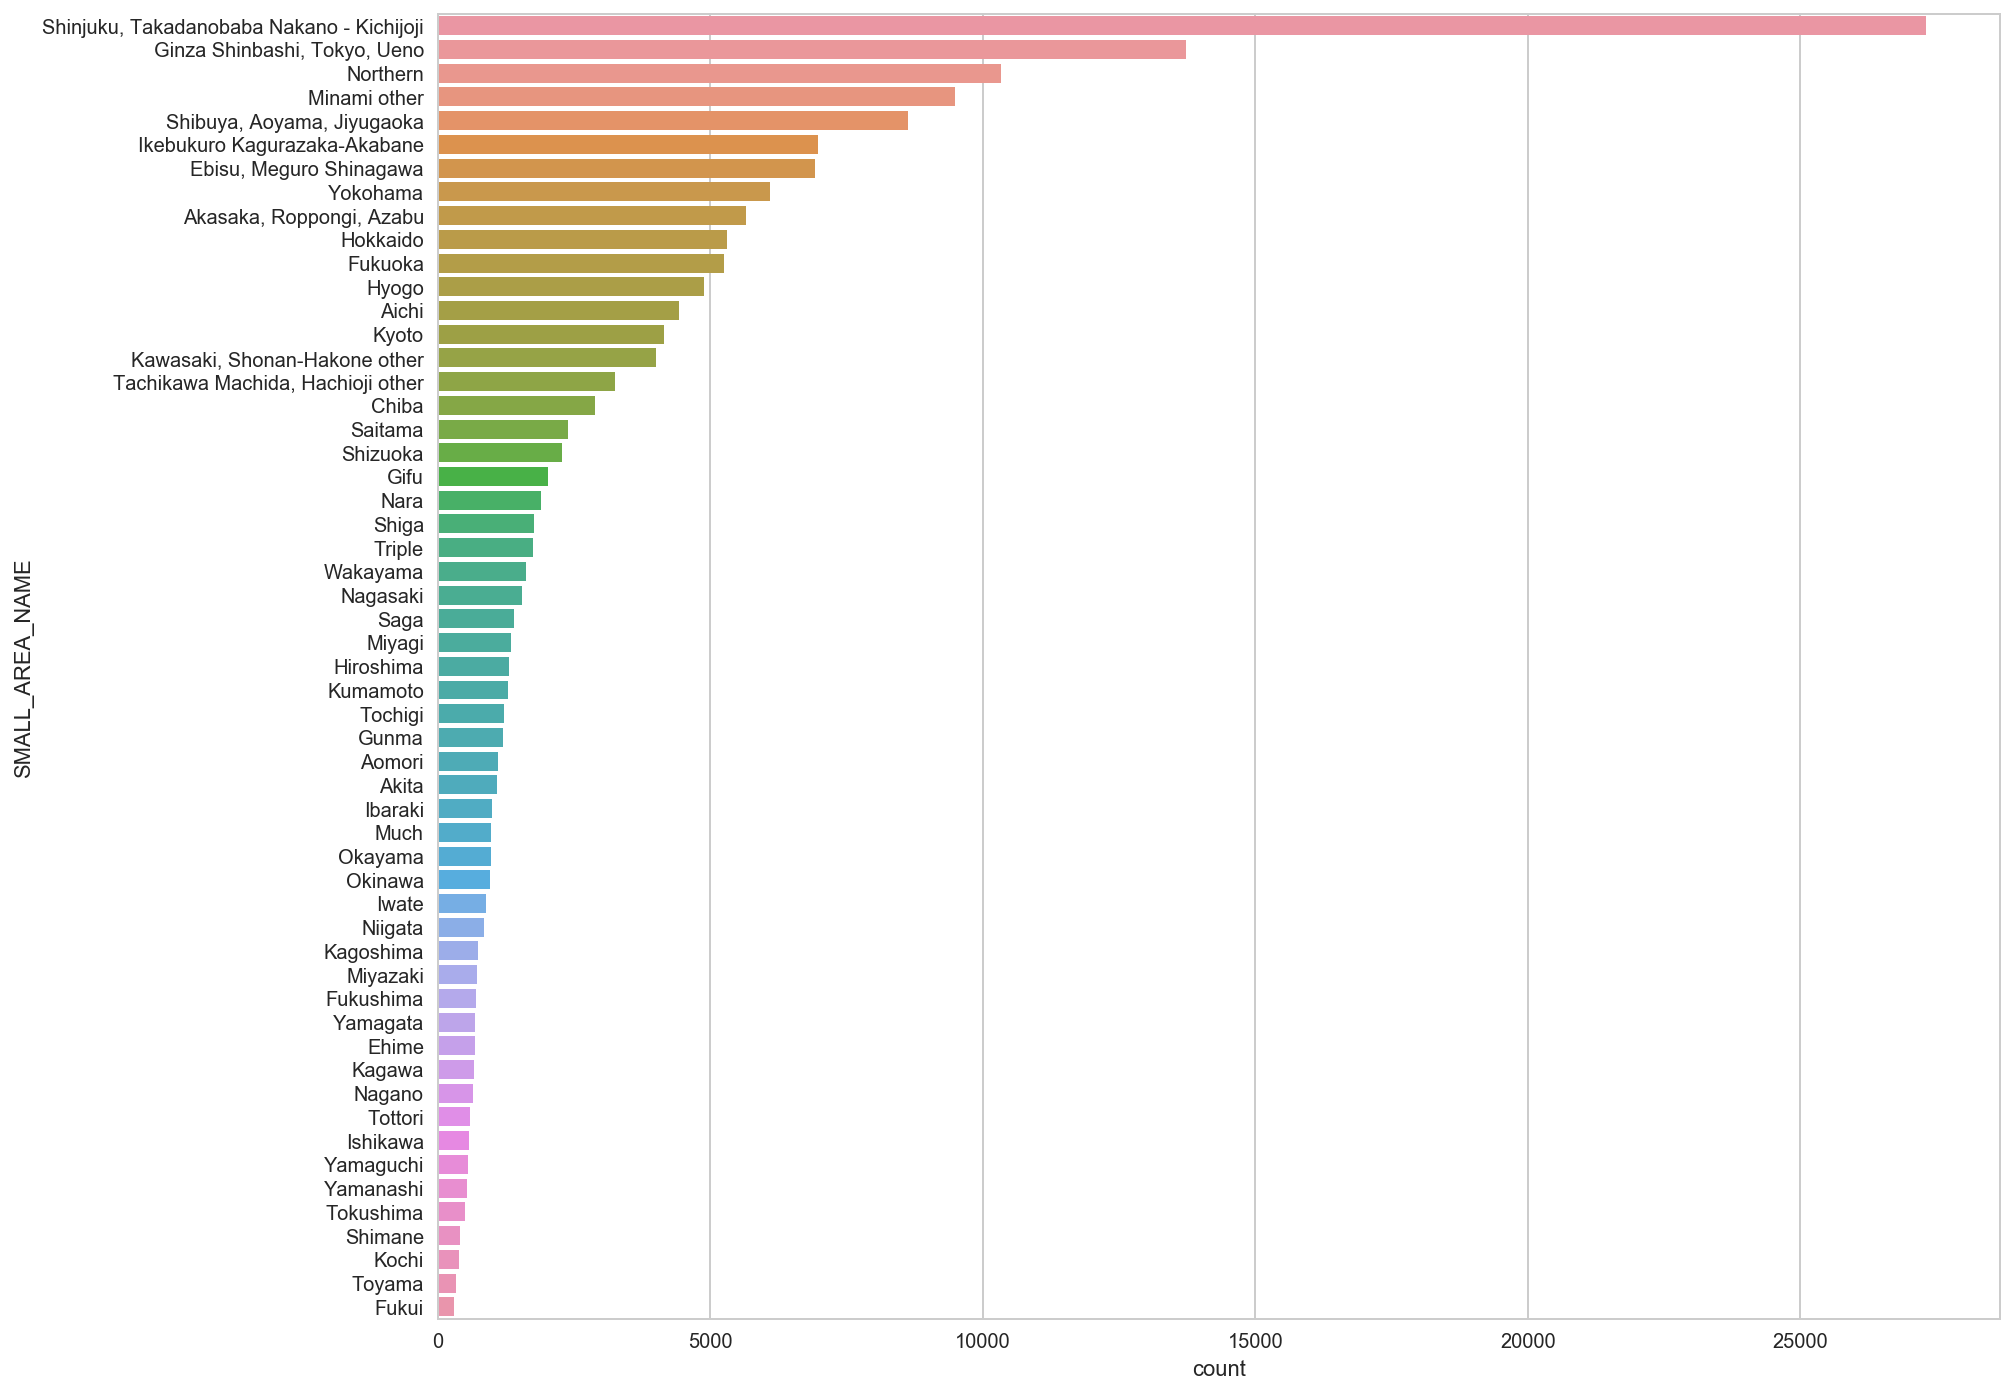

In [9]:
plt.figure(figsize=(14, 12))
sns.countplot(y = coupon_detail['SMALL_AREA_NAME'], data = coupon_detail, order = coupon_detail['SMALL_AREA_NAME'].value_counts().index)
plt.show()

### 6. PURCHASEID_hash

In [10]:
PURCHASEID_hash= coupon_detail.groupby("PURCHASEID_hash").size().reset_index(name='counts')
PURCHASEID_hash = PURCHASEID_hash.sort_values(by=['counts'], ascending=False)
PURCHASEID_hash = PURCHASEID_hash.reset_index(drop=True)
PURCHASEID_hash.head(10)

,PURCHASEID_hash,counts
0,0000655d8c1e67679c3c1a8887a97d10,1
1,aa768e83877cc9af89d2084b2b7f7160,1
2,aa76c10b5fc8341ef6f1d24a3f298530,1
3,aa76c7509f9c0473e0795781b36ff979,1
4,aa7739c3e38cd054bf4b0e4fbe9fab95,1
5,aa77566f19bd35ff3ff867e11b752f0f,1
6,aa777a377577cd4dd30ed7c09f3c69e1,1
7,aa77d9c380a67a34f1aac8937ba98c09,1
8,aa78add7c54f519fa25eb1cf4ad1a4ec,1
9,aa78e8155ceac5cdd15c091b62b7911c,1


### 7. USER_ID_hash 

In [11]:
USER_ID = coupon_detail.groupby("USER_ID_hash").size().reset_index(name='counts')
USER_ID = USER_ID.sort_values(by=['counts'], ascending=False)
USER_ID = USER_ID.reset_index(drop=True)
USER_ID.head(10)

,USER_ID_hash,counts
0,acd5e20541a5177e039835cef949d38d,101
1,01f61f5948da9c6c47bc47e6a959d48c,89
2,8a74bbcbdf2290988e92b4f0a52e57a7,87
3,e5ce4e00a1d90a6951940fea4acdd61b,86
4,e229db6f4d3554b8b96a8c04582b50eb,86
5,a52a3c977748da9f8329d963a1ea93b6,84
6,4c20177df5716ba57105ba5d9ed3c460,84
7,95450b42d18e10be665087b0da1e8728,83
8,b513d24721f5f8628c338a6271ab1154,81
9,06cbadc8825c72e0501eb22d08b1fe63,80


### 8. COUPON_ID_hash 

In [12]:
COUPON_ID = coupon_detail.groupby("COUPON_ID_hash").size().reset_index(name='counts')
COUPON_ID = COUPON_ID.sort_values(by=['counts'], ascending=False)
COUPON_ID = COUPON_ID.reset_index(drop=True)
COUPON_ID.head(10)

,COUPON_ID_hash,counts
0,a262c7ff56a5cd3de3c5c40443f3018c,5760
1,3d9029d3ec66802b11ee2645dc16e8cb,1511
2,09411858ae07c0be91aeeddacf4556b4,1016
3,7fc6567f470af5356ae97097dbe18486,863
4,bf69bd9e0e26fa1f62243d1fcada38f1,663
5,047fb1f23d8cedea8cb86956cfd4b7cf,628
6,36addcc4b958135895c859d8783e3cd2,524
7,3e6d617c55328b761d62510167c43c08,504
8,229ff5cc21c8d26615493be7f3b42841,494
9,4a79cd05ecb2bf8672e1d955f5faa7fa,466
